In [1]:
import Final_optimized_bckwd_script

#Error because of spec_offset in the load_workspace


 Loading the sample runs:  44462-44463 


 Loading the empty runs:  43868-43911 

instrPars first column: 
 [  3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.
  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.
  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.
  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118.
 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133. 134.]
[Spec------------------ Fit Pars---------------------Chi2 Nit]:

 [[  3.       0.008   18.6775 ...   9.0808   1.0906  42.    ]
 [  4.       0.0163  17.     ...   0.3807   1.0834  48.    ]
 [  5.       0.0094  17.     ...   0.

In [2]:
import numpy as np
newResults = np.load(r"C:\Users\guijo\Desktop\work_repos\scatt_scripts\backward\runs_data\opt_spec3-134_iter4_ncp_nightlybuild_synthetic.npz")
oldResults = np.load(r"C:\Users\guijo\Desktop\work_repos\scatt_scripts\backward\runs_data\opt_spec3-134_iter4_ncp_nightlybuild.npz")
oriResults = np.load(r"C:\Users\guijo\Desktop\work_repos\scatt_scripts\backward\runs_data\ori_spec3-134_iter4_ncp.npz")

np.testing.assert_allclose(newResults["all_mean_intensities"][0], oldResults["all_mean_intensities"][0])

newPars = newResults["all_spec_best_par_chi_nit"][0]
oriPars = oriResults["all_spec_best_par_chi_nit"][0]

#np.testing.assert_allclose(newPars, oriPars, rtol=1e-4)
for key in oldResults:
    try:
        print("evaluating: ",key)
        np.testing.assert_allclose(newResults[key][0], oldResults[key][0], rtol=1e-4)            
        print(newResults[key].shape)
    except KeyError:
        pass

evaluating:  all_fit_workspaces
(1, 132, 145)
evaluating:  all_spec_best_par_chi_nit
(1, 132, 15)
evaluating:  all_mean_widths
(1, 4)
evaluating:  all_mean_intensities
(1, 4)
evaluating:  all_tot_ncp
(1, 132, 144)
evaluating:  all_indiv_ncp


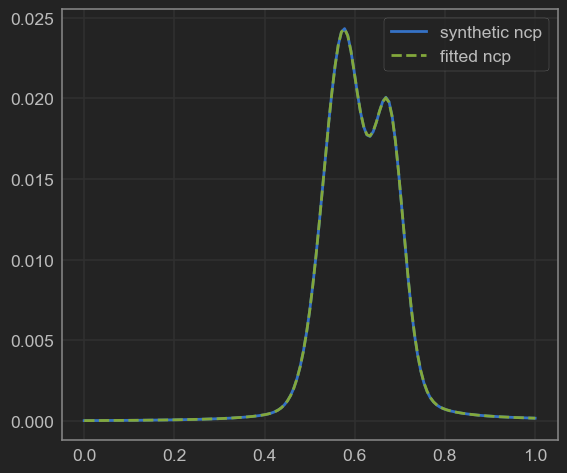

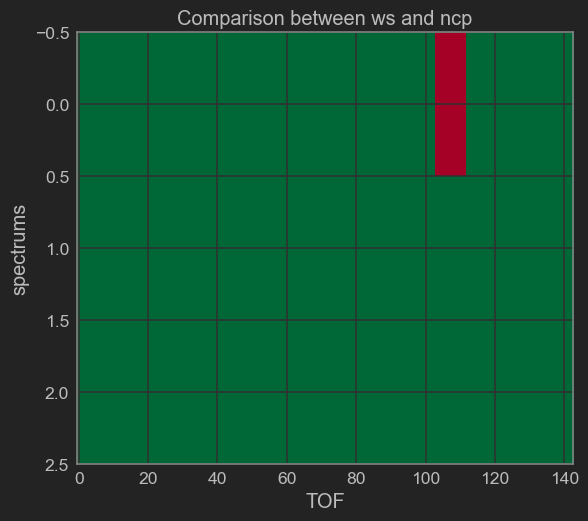

ValueError: operands could not be broadcast together with shapes (132,12) (3,12) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()
syn = np.load(r"C:\Users\guijo\Desktop\work_repos\scatt_scripts\backward\runs_data\opt_spec3-134_iter4_ncp_nightlybuild_synthetic.npz")

ws = syn["all_fit_workspaces"][0, :, :-1]
ncp = syn["all_tot_ncp"][0]


x = np.linspace(0, 1, len(ncp[0]))
plt.figure(3)
spec_idx = 1
plt.plot(x, ws[spec_idx], label="synthetic ncp", linewidth = 2)
plt.plot(x, ncp[spec_idx], "--", label="fitted ncp", linewidth = 2)
plt.legend()
plt.show()

opt = np.load(r"C:\Users\guijo\Desktop\work_repos\scatt_scripts\backward\runs_data\opt_spec3-134_iter4_ncp_nightlybuild.npz")

opt_pars = opt["all_spec_best_par_chi_nit"][0][:, 1:-2]
syn_pars = syn["all_spec_best_par_chi_nit"][0][:, 1:-2]

#np.testing.assert_allclose(opt_pars, syn_pars, rtol=0.1)
ncp_mask = np.isclose(ws, ncp, rtol=0.01, equal_nan = True)
plt.figure(0)
plt.imshow(ncp_mask, aspect="auto", cmap=plt.cm.RdYlGn, interpolation="nearest", norm=None)
plt.title("Comparison between ws and ncp")
plt.xlabel("TOF")
plt.ylabel("spectrums")
plt.show()

pars_mask = np.isclose(opt_pars, syn_pars, rtol=0.01, equal_nan=True)
fig = plt.figure(1)
plt.imshow(pars_mask, aspect="auto", cmap=plt.cm.RdYlGn, interpolation="nearest", norm=None)
plt.title("Comparison between parameters of ws and ncp")
plt.xlabel("12 best fit parameters (intensity, width, position)")
plt.ylabel("spectrums")
plt.show()

In [1]:
import numpy as np
syn = np.load(r"C:\Users\guijo\Desktop\work_repos\scatt_scripts\backward\runs_data\opt_spec3-134_iter4_ncp_nightlybuild_clean.npz")
opt = np.load(r"C:\Users\guijo\Desktop\work_repos\scatt_scripts\backward\runs_data\opt_spec3-134_iter4_ncp_nightlybuild.npz")
for key in opt:
    try:
        print(key)
        np.testing.assert_array_equal(syn[key], opt[key])
    except KeyError:
        pass

all_fit_workspaces
all_spec_best_par_chi_nit
all_mean_widths
all_mean_intensities
all_tot_ncp
all_indiv_ncp


In [6]:
import numpy as np
A = np.arange(12).reshape(4,3)
B = np.arange(2, 14).reshape(4,3)

C = np.array([A, B])
C

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[ 2,  3,  4],
        [ 5,  6,  7],
        [ 8,  9, 10],
        [11, 12, 13]]])